<a href="https://colab.research.google.com/github/harshithshankar13/Machine-Deep_Learning/blob/master/Classifying_natural_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mount images 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Using the following code train, validation and test data folders were divided into ratio 70:15:15

In [ ]:
# import os
# import numpy as np
# import shutil
# import random


# source = '/content/drive/My Drive/Thesis_Natural_Images/Natural_images'
# data_folder = '/content/drive/My Drive/Thesis_Natural_Images/Dataset'
# classes_list = ['/airplane','/car','/cat','/dog','/flower','/fruit','/motorbike','/person']
# val_ratio = 0.15
# test_ratio = 0.15

# # Creating Train/ Validation/ Test folders (One Time)

# for cls in classes_list:
#   os.makedirs(data_folder + '/Train' + cls)
#   os.makedirs(data_folder + '/Validation' + cls)
#   os.makedirs(data_folder + '/Test' + cls)
  
#   images_cls = source + cls # Folder from where images will be copied
  
#   all_images = os.listdir(images_cls)
#   np.random.shuffle(all_images)
#   train_images, val_images, test_images = np.split(np.array(all_images), [int(len(all_images) * (1 - (test_ratio + val_ratio))), int(len(all_images) * (1 - test_ratio))])
        
#   train_images = [images_cls + '/' + name for name in train_images.tolist()]
#   val_images = [images_cls + '/' + name for name in val_images.tolist()]
#   test_images = [images_cls + '/' + name for name in test_images.tolist()]
        
#   print("Total no. of " + cls + " images: ", len(all_images))
#   print("No. of Training images: ", len(train_images))
#   print("No. of Validation images", len(val_images))
#   print("No. of Test images", len(test_images))
        
#   # Copying images and Pasting it to Train/ Validation/ Test Folders
#   for name in train_images:
#     shutil.copy(name, data_folder + '/Train' + cls)
#   for name in val_images:
#     shutil.copy(name, data_folder + '/Validation' + cls)
#   for name in test_images:
#     shutil.copy(name, data_folder + '/Test' + cls)

In [6]:
# pre processing using keras - flow from directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator

generator = ImageDataGenerator(rescale=1.0/255) # normalising

train = generator.flow_from_directory('/content/drive/My Drive/Thesis_Natural_Images/Dataset/Train/', target_size=(256,256), class_mode='categorical', batch_size=64, shuffle=False)
val = generator.flow_from_directory('/content/drive/My Drive/Thesis_Natural_Images/Dataset/Validation/', target_size=(256,256), class_mode='categorical', batch_size=64, shuffle=False)
test = generator.flow_from_directory('/content/drive/My Drive/Thesis_Natural_Images/Dataset/Test/', target_size=(256,256), class_mode='categorical', batch_size=64, shuffle=False)

Found 4826 images belonging to 8 classes.
Found 1034 images belonging to 8 classes.
Found 1039 images belonging to 8 classes.


# CNN model

In [12]:
from tensorflow.keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D, BatchNormalization

In [ ]:
def CNN():

  model = Sequential()

  image_shape = input_shape=(256,256,3)
  # 1st conv
  model.add(Conv2D(25, (5,5), activation='relu',strides=(1,1), padding='same', input_shape= image_shape))
  model.add(MaxPool2D(pool_size=(2,2), padding='same'))

  #2nd conv
  model.add(Conv2D(50, (5,5), activation='relu',strides=(2,2), padding='same', input_shape= image_shape))
  model.add(MaxPool2D(pool_size=(2,2), padding='same'))
  model.add(BatchNormalization())

  #3rd conv
  model.add(Conv2D(75, (5,5), activation='relu',strides=(2,2), padding='same', input_shape= image_shape))
  model.add(MaxPool2D(pool_size=(2,2), padding='valid'))
  model.add(BatchNormalization())

  # ANN dense network
  model.add(Flatten())
  model.add(Dense(units=100, activation='relu'))
  model.add(Dense(units=100, activation='relu'))
  model.add(Dropout(0.25))

  # output layer
  model.add(Dense(units=8, activation='softmax'))

  # parameter setting
  model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

  return model

In [ ]:
# fit/train model with data
Cnn = CNN()

Cnn.fit_generator(train, epochs=30, steps_per_epoch=20, validation_data=val)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
20/20 [==============================] - 1108s 56s/step - loss: 2.7109 - accuracy: 0.2468 - val_loss: 2.0841 - val_accuracy: 0.1847
Epoch 2/30
20/20 [==============================] - 432s 22s/step - loss: 1.9486 - accuracy: 0.3746 - val_loss: 1.9865 - val_accuracy: 0.1809
Epoch 3/30
20/20 [==============================] - 468s 23s/step - loss: 1.2904 - accuracy: 0.5679 - val_loss: 1.6840 - val_accuracy: 0.3685
Epoch 4/30
20/20 [==============================] - 284s 13s/step - loss: 1.6718 - accuracy: 0.4458 - val_loss: 1.9066 - val_accuracy: 0.2050
Epoch 5/30
20/20 [==============================] - 271s 12s/step - loss: 0.7099 - accuracy: 0.7706 - val_loss: 1.2975 - val_accuracy: 0.5822
Epoch 6/30
20/20 [==============================] - 199s 10s/step - loss: 0.5765 - accuracy: 0.8137 - val_loss: 1.1052 - val_accuracy: 0.6402
Epoch 7/30
20/20 [==============================] - 176s 8s/step - loss: 0.4612 - accuracy: 0.8388 - val_loss: 1.0590 - val_accuracy: 0.6161
Epoch 

In [5]:
#Cnn.save('/content/drive/My Drive/Colab Notebooks/colab_meta_data/CNN.h5')

In [4]:
import keras
Cnn = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/colab_meta_data/CNN.h5')

In [6]:
# evaluate
Cnn.evaluate(test)

17/17 [==============================] - 469s 29s/step - loss: 0.4356 - accuracy: 0.8681


[0.4355902075767517, 0.8681424260139465]

In [1]:
import numpy as np
from keras.preprocessing import image

img = image.load_img('/content/drive/My Drive/Natural_images/car/car_0001.jpg', target_size = (256, 256,3))#
img = image.img_to_array(img)
#img= img.reshape(-1, 256, 256, 3)
img = np.expand_dims(img, axis = 0)
img = np.vstack([img])

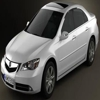

In [2]:
from IPython.display import Image

Image(filename='/content/drive/My Drive/Natural_images/car/car_0001.jpg')

In [7]:
Cnn.predict(img)

In [ ]:
test.class_indices

{'airplane': 0,
 'car': 1,
 'cat': 2,
 'dog': 3,
 'flower': 4,
 'fruit': 5,
 'motorbike': 6,
 'person': 7}

# Using Transfer learning - 
##VGG16 (Visual Geometry Group from Oxford)

In [3]:
from keras.applications import VGG16

In [4]:
VGG16Model = VGG16(include_top=False, input_shape=(256,256,3), classes = 8)

58892288/58889256 [==============================] - 1s 0us/step


In [7]:
# get feature from pre-trained model
train_feature = VGG16Model.predict(train)
var_feature = VGG16Model.predict(val)

from keras.utils import to_categorical
# get classes
train_target = to_categorical(train.labels)
var_target = to_categorical(val.labels)

In [8]:
var_feature = VGG16Model.predict(val)

In [9]:
var_target

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [10]:
VGG16Model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [13]:
VggModel = Sequential()
VggModel.add(Flatten()) # input_shape = (8,8,512)
VggModel.add(Dense(100, activation='relu'))
VggModel.add(Dropout(0.25))
VggModel.add(BatchNormalization())
VggModel.add(Dense(8, activation='softmax'))

# compile the model
VggModel.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

# train model using features generated from VGG16 model
VggModel.fit(train_feature, train_target, epochs=10, validation_data=(var_feature, var_target))

Epoch 1/10
151/151 [==============================] - 2s 7ms/step - loss: 0.4260 - accuracy: 0.8850 - val_loss: 0.0729 - val_accuracy: 0.9778
Epoch 2/10
151/151 [==============================] - 1s 6ms/step - loss: 0.0706 - accuracy: 0.9866 - val_loss: 0.0661 - val_accuracy: 0.9836
Epoch 3/10
151/151 [==============================] - 1s 6ms/step - loss: 0.0281 - accuracy: 0.9973 - val_loss: 0.0439 - val_accuracy: 0.9874
Epoch 4/10
151/151 [==============================] - 1s 6ms/step - loss: 0.0175 - accuracy: 0.9988 - val_loss: 0.0632 - val_accuracy: 0.9826
Epoch 5/10
151/151 [==============================] - 1s 6ms/step - loss: 0.0102 - accuracy: 0.9993 - val_loss: 0.0458 - val_accuracy: 0.9894
Epoch 6/10
151/151 [==============================] - 1s 6ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.0454 - val_accuracy: 0.9865
Epoch 7/10
151/151 [==============================] - 1s 6ms/step - loss: 0.0095 - accuracy: 0.9986 - val_loss: 0.0450 - val_accuracy: 0.9884
Epoch 

In [14]:
test_feature = VGG16Model.predict(test)
test_classes = to_categorical(test.labels)

In [15]:

VggModel.evaluate(test_feature, test_classes )

33/33 [==============================] - 0s 4ms/step - loss: 0.0468 - accuracy: 0.9827


[0.046771880239248276, 0.9826756715774536]

# InceptionV3 (GoogLeNet) 

In [16]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [17]:
inception = InceptionV3(include_top=False, weights='imagenet', input_shape=(256,256,3), classes=8)

87916544/87910968 [==============================] - 1s 0us/step


In [18]:
# make all layers not trainable
for layer in inception.layers:
  layer.trainable = False

In [19]:
from keras import layers, Model
from keras.optimizers import Adam

# flatten output layer to  1 dimention
x = Flatten()(inception.output)
# add dense layer
x = Dense(1024, activation="relu")(x)
x = Dropout(0.50)(x)
x= BatchNormalization()(x)

# output layer
x = Dense(8, activation='sigmoid')(x)

inceptionModel = Model(inputs= inception.inputs, outputs=x)

inceptionModel.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['acc'])

In [20]:
inceptionModel.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization_1[0][0]      
______________________________________________________________________________________________

In [21]:
inceptionModel.fit(train, epochs= 10, validation_data=val)

Epoch 1/10
76/76 [==============================] - 29s 319ms/step - loss: 2.5551 - acc: 0.1242 - val_loss: 1.0909 - val_acc: 0.7360
Epoch 2/10
76/76 [==============================] - 22s 294ms/step - loss: 2.1410 - acc: 0.1874 - val_loss: 1.3250 - val_acc: 0.8569
Epoch 3/10
76/76 [==============================] - 23s 293ms/step - loss: 2.1060 - acc: 0.1718 - val_loss: 1.3953 - val_acc: 0.8153
Epoch 4/10
76/76 [==============================] - 22s 293ms/step - loss: 2.0910 - acc: 0.1762 - val_loss: 1.3979 - val_acc: 0.6915
Epoch 5/10
76/76 [==============================] - 23s 296ms/step - loss: 2.0452 - acc: 0.2163 - val_loss: 1.5212 - val_acc: 0.5329
Epoch 6/10
76/76 [==============================] - 22s 293ms/step - loss: 2.0599 - acc: 0.1982 - val_loss: 1.4540 - val_acc: 0.8762
Epoch 7/10
76/76 [==============================] - 22s 293ms/step - loss: 2.0140 - acc: 0.2439 - val_loss: 1.3055 - val_acc: 0.8868
Epoch 8/10
76/76 [==============================] - 22s 290ms/step - 

In [22]:
inceptionModel.evaluate(test)

17/17 [==============================] - 4s 254ms/step - loss: 1.1715 - acc: 0.8316


[1.1714740991592407, 0.8315688371658325]

In [ ]:
inceptionModel.save('/content/drive/My Drive/Colab Notebooks/colab_meta_data/CNN_inception_NI.h5')